In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-scientist-linkedin-job-postings/postings.csv


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/data-scientist-linkedin-job-postings/postings.csv')
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342 entries, 0 to 4341
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       4342 non-null   object
 1   company         4342 non-null   object
 2   job_location    4342 non-null   object
 3   job_link        4342 non-null   object
 4   first_seen      4342 non-null   object
 5   search_city     4342 non-null   object
 6   search_country  4342 non-null   object
 7   job level       4342 non-null   object
 8   job_type        4342 non-null   object
 9   job_summary     4338 non-null   object
 10  job_skills      4336 non-null   object
dtypes: object(11)
memory usage: 373.3+ KB


# Eksik Değerler


In [4]:
df.isnull().sum()

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       4
job_skills        6
dtype: int64

In [5]:
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64


/tmp/ipykernel_17/3035272055.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Veri Setlerinin İlk 4 Satırı ve Son 4 Satırı

In [6]:
df.head(4)


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,Technical Data Analyst,Jefferson Health Plans,"Philadelphia, PA",https://www.linkedin.com/jobs/view/technical-d...,2023-12-20,Phoenixville,United States,Associate,Remote,Why Choose Jefferson Health Plans?\nWe are an ...,"KNIME, QlikView, SQL, MS Access, MS Excel, Log..."
1,Data Center Engineer - Minneapolis,DeRisk Technologies,"Minneapolis, MN",https://www.linkedin.com/jobs/view/data-center...,2023-12-20,Minneapolis,United States,Associate,Onsite,Job Responsibilities:\nDeployment / In-Scope C...,"Server, Storage, Backup, Networking, Virtualiz..."
2,Data Analyst,Avani Tech Solutions Private Limited,"Minneapolis, MN",https://www.linkedin.com/jobs/view/data-analys...,2023-12-20,Minneapolis,United States,Associate,Onsite,Success Factor knowledge\nSchedule : Monday th...,"Data Management, HR Data Retention Controls, C..."
3,Data Engineer II - NBC Sports Next,NBC Sports Next,"Minneapolis, MN",https://www.linkedin.com/jobs/view/data-engine...,2023-12-20,Minneapolis,United States,Associate,Remote,Company Description\nNBC Sports Next is where ...,"Data Engineering, Data Warehousing, SQL, MySQL..."


In [7]:
df.tail(4)


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
4338,Senior Data Scientist,Harnham,"Bristol, England, United Kingdom",https://uk.linkedin.com/jobs/view/senior-data-...,2023-12-20,Newport,United Kingdom,Mid senior,Onsite,To Apply for this Job Click Here\nSENIOR DATA ...,"Data Science, Machine Learning, Python, R, Sta..."
4339,Associate/Principal Mechanical Engineer - Data...,Hydrock,"Bristol, England, United Kingdom",https://uk.linkedin.com/jobs/view/associate-pr...,2023-12-20,Newport,United Kingdom,Mid senior,Onsite,Job Advert\nWe have a fantastic opportunity fo...,"Mechanical Engineering, Data Centre Design, Pr..."
4340,Senior Data Scientist,Robert Half,"Bristol, England, United Kingdom",https://uk.linkedin.com/jobs/view/senior-data-...,2023-12-20,Newport,United Kingdom,Mid senior,Hybrid,Robert Half partners exclusively with Envelop ...,"Python, SQL, Tableau, Power BI, GCP, AWS, Azur..."
4341,Customer Service Representative/Data Analyst/D...,Bluebeacontruckwash,"Medicine Hat, Alberta, Canada",https://ca.linkedin.com/jobs/view/customer-ser...,2023-12-20,Medicine Hat,Canada,Mid senior,Onsite,Summary:\nThe Data Analyst will be responsible...,"Data Analysis, Statistical Analysis, Data Visu..."


# Sütun Etiketleri

In [8]:
df.columns

Index(['job_title', 'company', 'job_location', 'job_link', 'first_seen',
       'search_city', 'search_country', 'job level', 'job_type', 'job_summary',
       'job_skills'],
      dtype='object')

# Değişken Açıklaması

* job_title: İlan edilen pozisyonun adı.
* company: İş ilanını yayınlayan şirketin adı. 
* job_location: İşin yapılacağı konum.
* job_link: İlgili iş ilanının LinkedIn'deki bağlantısı.
* first_seen: İş ilanının ilk olarak veri setinde görüldüğü tarih.
* search_city: İlgili arama sırasında kullanılan şehir bilgisi.
* search_country: İlgili arama sırasında kullanılan ülke bilgisi.
* job level: Pozisyonun kariyer seviyesini belirten bilgi.
* job_type: İş türünü belirten bilgi (ör. tam zamanlı, yarı zamanlı).
* job_summary: İş ilanının kısa açıklaması.
* job_skills: Pozisyon için istenen becerilerin listesi.



In [9]:
df.describe()


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
count,4342,4342,4342,4342,4342,4342,4342,4342,4342,4342,4342
unique,2030,1998,1159,4342,1,645,4,2,3,3455,4312
top,Data Scientist,Recruiting from Scratch,"London, England, United Kingdom",https://www.linkedin.com/jobs/view/technical-d...,2023-12-20,Hollywood,United States,Mid senior,Onsite,Specialty/Competency:\nData Science\nIndustry/...,"PostgreSQL, MySQL, Oracle, SQL, PL/SQL, pgPL/S..."
freq,305,117,86,1,4342,87,3531,3376,1904,55,5


# VERİ GÖRSELLEŞTİRME

# Veri Bilimci İş İlanı Bulunan Ülkeler:

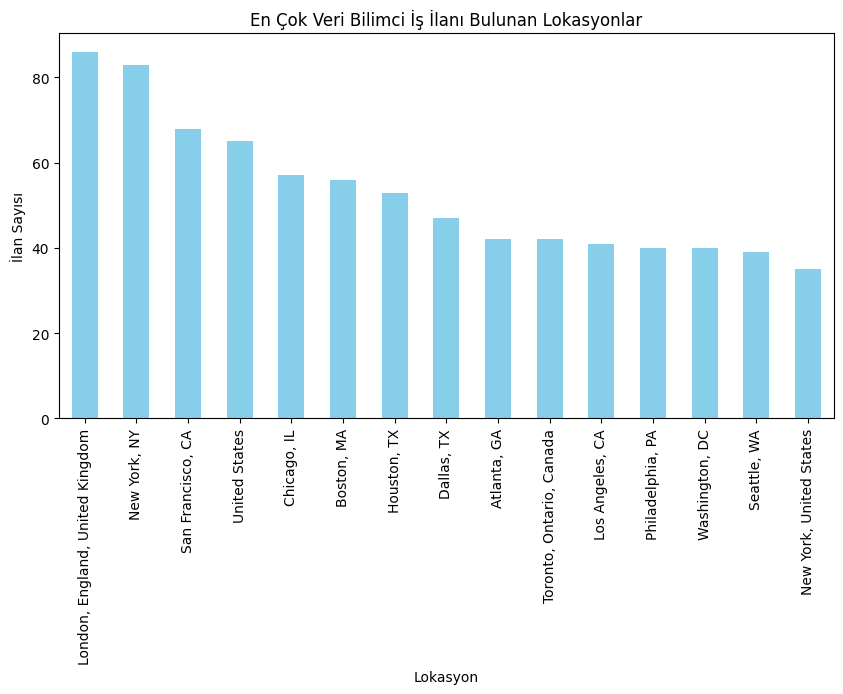

In [10]:
location_counts = df['job_location'].value_counts()

# İlk 10 lokasyonu görselleştirme
import matplotlib.pyplot as plt

location_counts.head(15).plot(kind='bar', figsize=(10, 5), color=('skyblue'))
plt.title('En Çok Veri Bilimci İş İlanı Bulunan Lokasyonlar')
plt.xlabel('Lokasyon')
plt.ylabel('İlan Sayısı')
plt.show()

# En Fazla Veri Bilimi İlanı Veren Şirketler

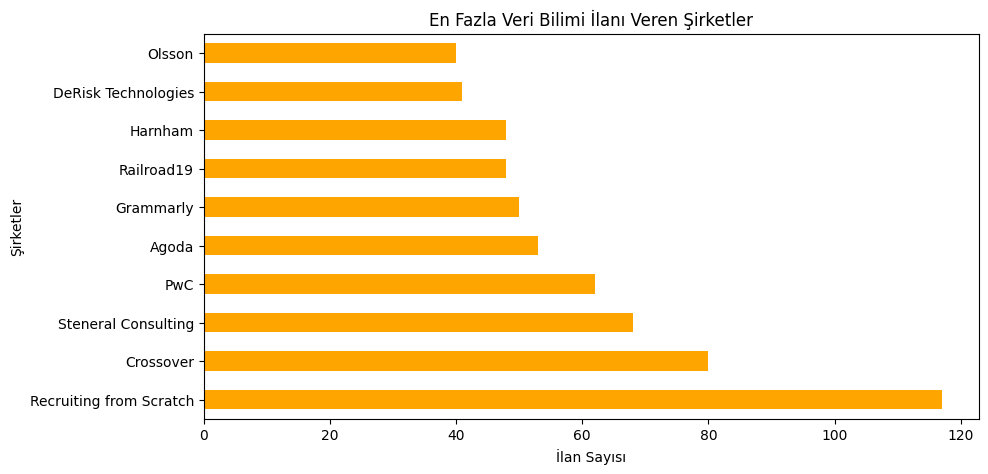

In [11]:
# Şirketlerin ilan sayısını say ve en çok ilan veren 10 şirketi seç
top_companies = df['company'].value_counts().head(10)

# Görselleştirme
top_companies.plot(kind='barh', color='orange', figsize=(10, 5))
plt.title('En Fazla Veri Bilimi İlanı Veren Şirketler')
plt.xlabel('İlan Sayısı')
plt.ylabel('Şirketler')
plt.show()

# İş Seviyelerine Göre Dağılım

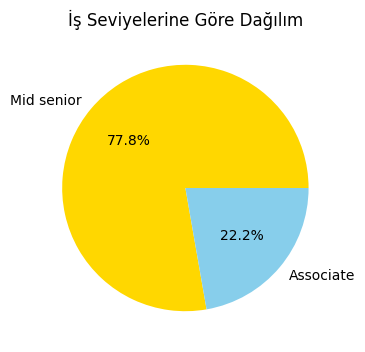

In [12]:

job_levels = df['job level'].value_counts()

# Pasta grafiğiyle görselleştirme
job_levels.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4), colors=['gold', 'skyblue', 'lightgreen'])
plt.title('İş Seviyelerine Göre Dağılım')
plt.ylabel('')  # Y eksenini gizle
plt.show()

# Çalışma Türlerine Göre İş İlanları

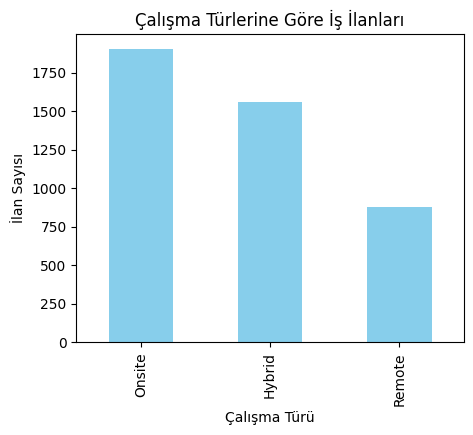

In [13]:
# Çalışma türlerini analiz et
job_types = df['job_type'].value_counts()

# Çalışma türlerinin dağılımı
job_types.plot(kind='bar', color='skyblue', figsize=(5, 4))
plt.title('Çalışma Türlerine Göre İş İlanları')
plt.xlabel('Çalışma Türü')
plt.ylabel('İlan Sayısı')
plt.show()

# Veri Bilimi Alanında En Çok Talep Edilen Beceriler

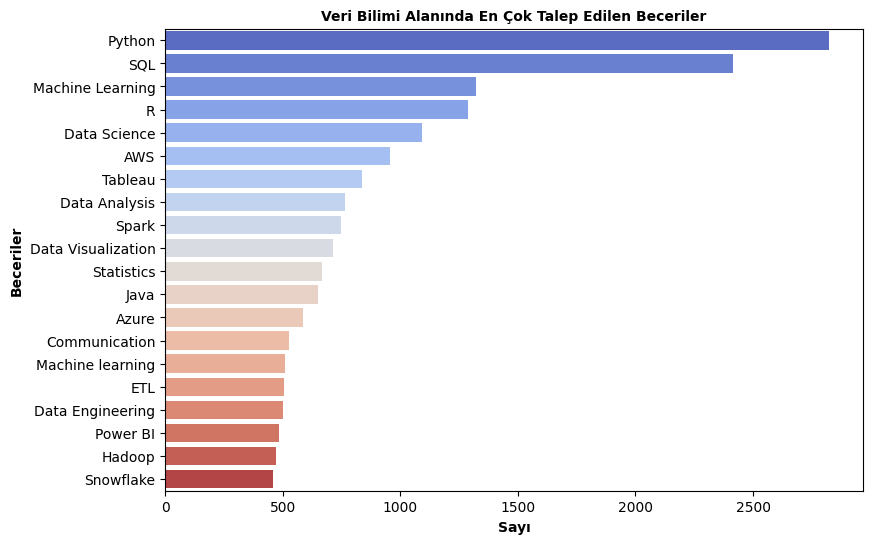

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme
df = pd.read_csv('/kaggle/input/data-scientist-linkedin-job-postings/postings.csv')

# 'job_skills' sütununu string olarak işleme
df['job_skills'] = df['job_skills'].astype(str)

# Beceri listesini oluşturma ve patlatma
df['Individual Skill'] = df['job_skills'].str.split(', ')  # Virgül ve boşlukla ayır
df_exploded = df.explode('Individual Skill')  # Her beceriyi ayrı satır olarak genişlet

# Beceri sayımını hesaplama
skills_count = df_exploded['Individual Skill'].value_counts().reset_index()
skills_count.columns = ['Skill', 'Count']

# İlk 20 beceriyi görselleştirme
plt.figure(figsize=(9, 6))
sns.barplot(data=skills_count.head(20), x='Count', y='Skill', palette='coolwarm')
plt.title('Veri Bilimi Alanında En Çok Talep Edilen Beceriler', fontsize=10, fontweight='bold')
plt.xlabel('Sayı', fontsize=10, fontweight='bold')
plt.ylabel('Beceriler', fontsize=10, fontweight='bold')
plt.show()


# İş Türüne Göre İş Düzeyi Dağılımı

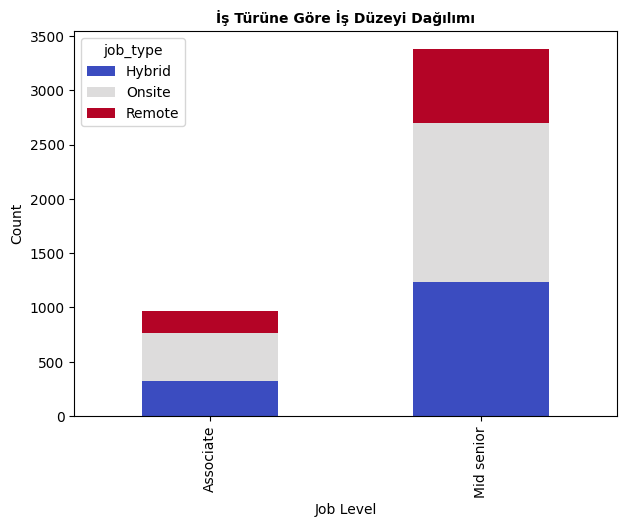

In [15]:
job_level_by_type = df.groupby(['job level', 'job_type']).size().unstack(fill_value=0)

# Plot the data
job_level_by_type.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='coolwarm')
plt.title('İş Türüne Göre İş Düzeyi Dağılımı', fontsize=10, fontweight='bold')
plt.xlabel('Job Level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()